In [357]:
# %matplotlib inline
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

import plotly.express as px
import plotly.graph_objects as go
import plotly.offline as pyo
import plotly.io as pio
from plotly.subplots import make_subplots

pyo.init_notebook_mode(connected = True)

from sklearn.decomposition import PCA

In [2]:
# plotting parameters
grey = "#21201F"
green = "#9AC529"
lblue = "#42B9B2"
pink = "#DE237B"
orange = "#F38A31"

nt_colors = [green, lblue, pink, orange]

plt.style.use("ggplot")
fig_width = 12  # width in inches
fig_height = 9  # height in inches
fig_size = [fig_width, fig_height]
plt.rcParams["figure.figsize"] = fig_size
plt.rcParams["figure.autolayout"] = True

sns.set(
    style="white",
    context="notebook",
    font_scale=1,
    rc={
        "axes.labelcolor": grey,
        "text.color": grey,
        "axes.edgecolor": grey,
        "xtick.color": grey,
        "ytick.color": grey,
    },
)

sns.set_palette(sns.color_palette
(nt_colors))

# Load data

In [171]:
df_markers = pd.read_csv('Data/all_markers.csv')
aucs_mw = pd.read_csv('Data/segment_auc_dmw_vs_smw.csv').agg('mean').to_frame('auc').reset_index()
aucs_mind = pd.read_csv('Data/segment_auc_ot_vs_mw.csv').agg('mean').to_frame('auc').reset_index()
aucs_mw= aucs_mw[aucs_mw['index'] != 'Unnamed: 0']
aucs_mind= aucs_mind[aucs_mind['index'] != 'Unnamed: 0']

In [199]:
df_mind = (
    df_markers
    .query("probe == 'PC'")
    .assign(
    mind2 = lambda df: np.where(df.mind == 'on-task', 'on-task', 'mw'))
    .groupby(['mind2'], as_index = False).mean()
).melt(id_vars = ['mind2'], var_name = 'markers', value_name = 'val')

df_mw = (
    df_markers
    .query("probe == 'SC'")
    .query("mind != 'on-task'")
    .groupby(['mind'], as_index =False).mean()
).melt(id_vars = ['mind'], var_name = 'markers', value_name = 'val')


In [303]:
markers = ['wSMI_1', 'wSMI_2', 'wSMI_4', 'wSMI_8', 'p_e_1', 'p_e_2',
       'p_e_4', 'p_e_8', 'k', 'b', 'b_n', 'g', 'g_n', 't', 't_n',
       'd', 'd_n', 'a_n', 'a', 'CNV', 'P1', 'P3a', 'P3b']
erps =['CNV', 'P1', 'P3a', 'P3b']
freqs = ['d','t','a', 'b','g']
freqs_n = ['d_n','t_n','a_n', 'b_n','g_n']
wsmi = ['wSMI_1', 'wSMI_2', 'wSMI_4', 'wSMI_8',]
p_e = [ 'p_e_1', 'p_e_2','p_e_4', 'p_e_8',]

types_markers = [erps, freqs, freqs_n, wsmi, p_e]

signficant_markers = [ 'wSMI_4_std','p_e_1_mean', 'p_e_2_mean','p_e_4_mean', 'p_e_8_mean', 'k_std', 't_mean', 't_n_mean',
 'd_n_mean','a_n_mean', 'a_n_std', 'a_mean', 'a_std','b_mean', 'P1_std', 'P3a_mean']

significant_mind = ['p_e_4_mean','k_std','b_mean','t_n_mean']
significant_mw = ['wSMI_4_std', 'p_e_1_mean', 'p_e_2_mean', 'p_e_8_mean', 'b_mean', 't_mean',
 'd_n_mean', 'a_n_mean', 'a_n_std', 'a_mean', 'a_std', 'P1_std', 'P3a_mean']

In [335]:
def symbol_fun(markers, significants):
    symbols = []
    for marker in markers:
        if marker in significants:
            symbols.append('hexagram')
        else:
            symbols.append('circle-open')
    return symbols

['circle-open', 'hexagram', 'hexagram', 'hexagram', 'circle-open']

# Significant polar plots

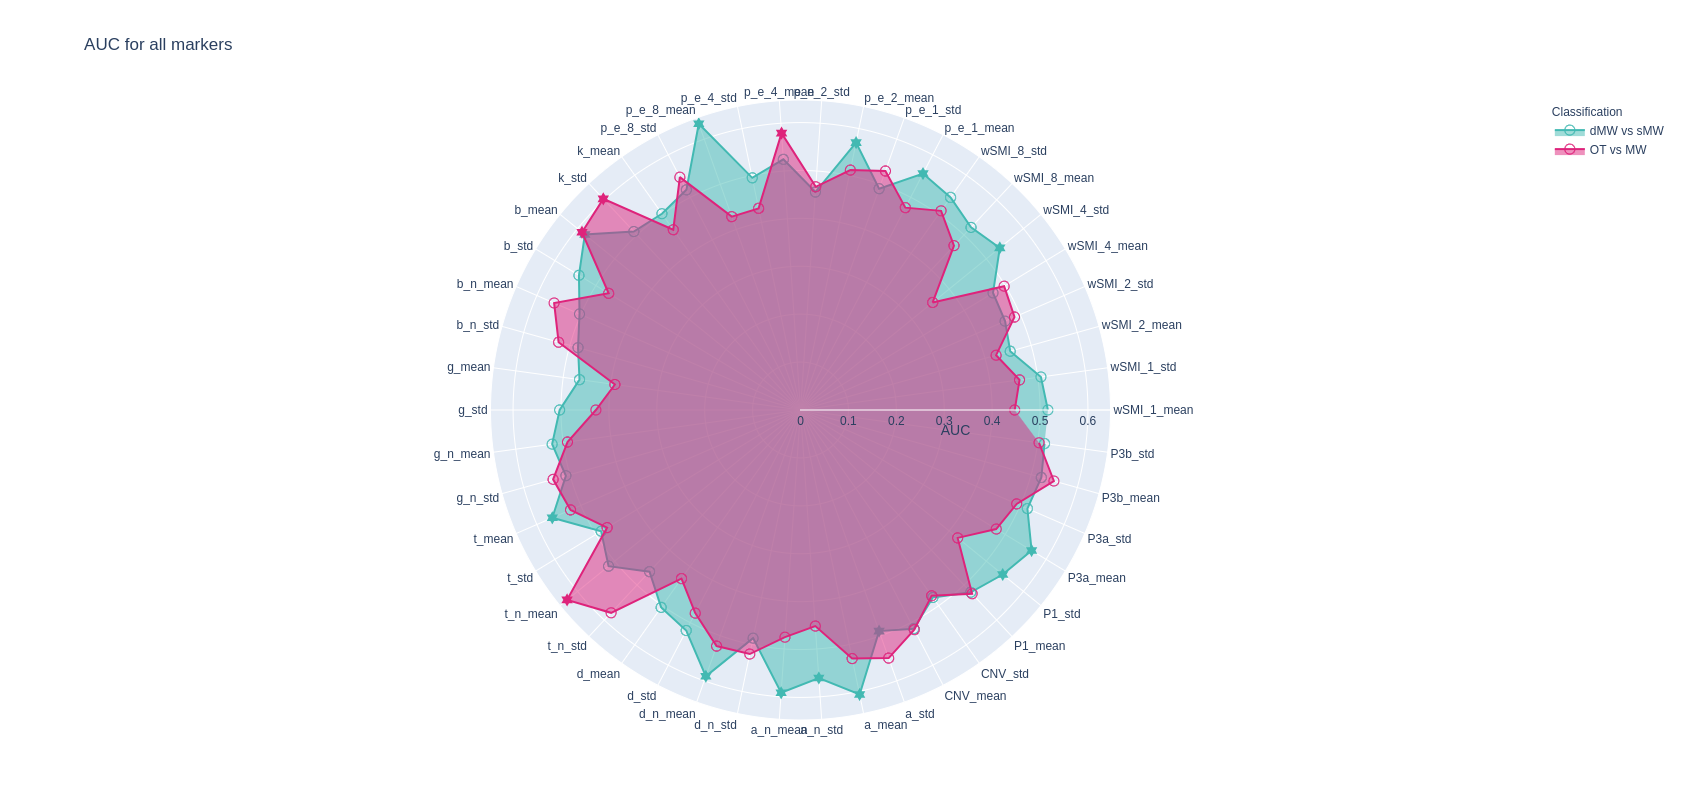

In [336]:
mw =aucs_mw
mind =aucs_mind

fig = go.Figure()

fig.add_trace(go.Scatterpolar(
    r=mw.auc,
    theta=mw['index'],
    fill='toself',
    name='dMW vs sMW',
    mode = 'lines+markers',
    marker = {'color':lblue, 'size': 10},
    marker_symbol= symbol_fun(mw['index'], significant_mw)
))

fig.add_trace(go.Scatterpolar(
    r=mind.auc,
    theta=mind['index'],
    fill='toself',
    name='OT vs MW',
    mode = 'lines+markers',
    marker = {'color':pink, 'size': 10},
    marker_symbol= symbol_fun(mind['index'], significant_mind)
))


fig.update_layout(
    title="AUC for all markers",
    legend_title="Classification",
    width=800,
    height=800,
    
  polar=dict(
    radialaxis=dict(
    title = 'AUC',
      visible=True,
    ),
  ),
    
  showlegend=True
)

fig.show()
pio.write_json(fig, 'Figs/radar_auc_all.plotly')

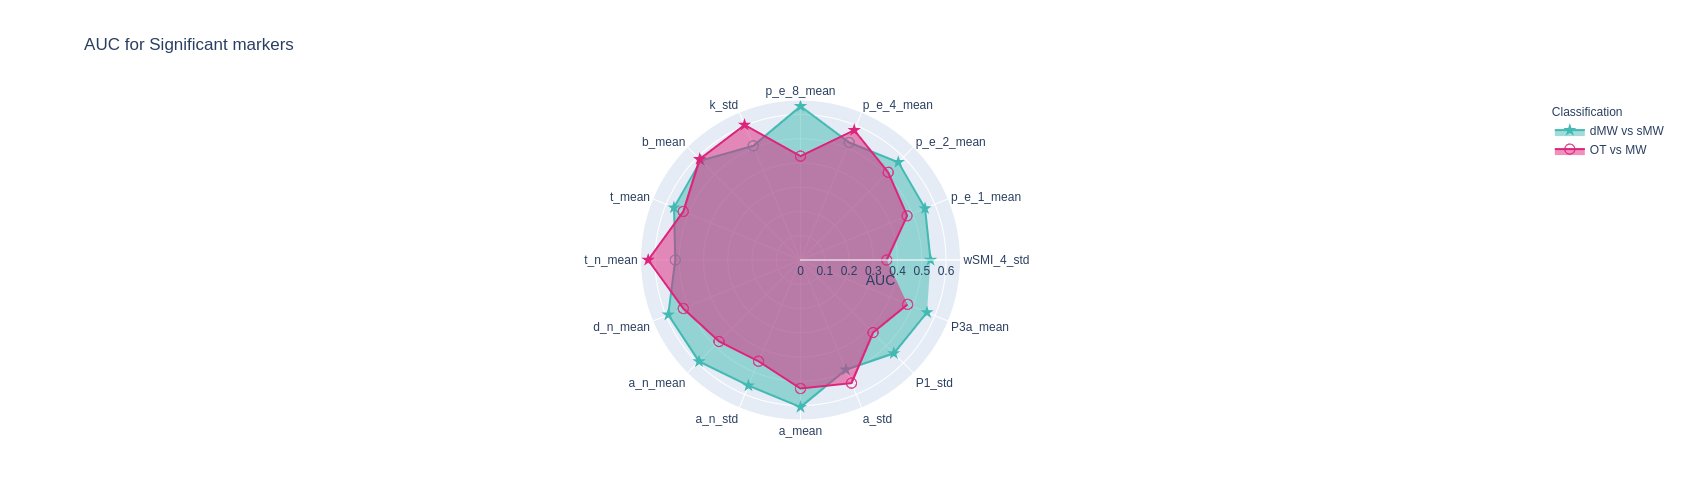

In [334]:
mw =aucs_mw[aucs_mw['index'].isin([i for i in signficant_markers])]
mind =aucs_mind[aucs_mind['index'].isin([i for i in signficant_markers])]

fig = go.Figure()

fig.add_trace(go.Scatterpolar(
    r=mw.auc,
    theta=mw['index'],
    fill='toself',
    name='dMW vs sMW', 
    marker = {'color':lblue, 'size': 10},
    marker_symbol= symbol_fun(mw['index'], significant_mw)
))

fig.add_trace(go.Scatterpolar(
    r=mind.auc,
    theta=mind['index'],
    fill='toself',
    name='OT vs MW',
    marker = {'color':pink, 'size': 10},
    marker_symbol= symbol_fun(mind['index'], significant_mind)
))


fig.update_layout(
    title="AUC for Significant markers",
    legend_title="Classification",
    width=500,
    height=500,
    
  polar=dict(
    radialaxis=dict(
    title = 'AUC',
      visible=True,
    ),
  ),
    
  showlegend=True
)

fig.show()
pio.write_json(fig, 'Figs/radar_auc_significant.plotly')

# Radar plots for all type of markers

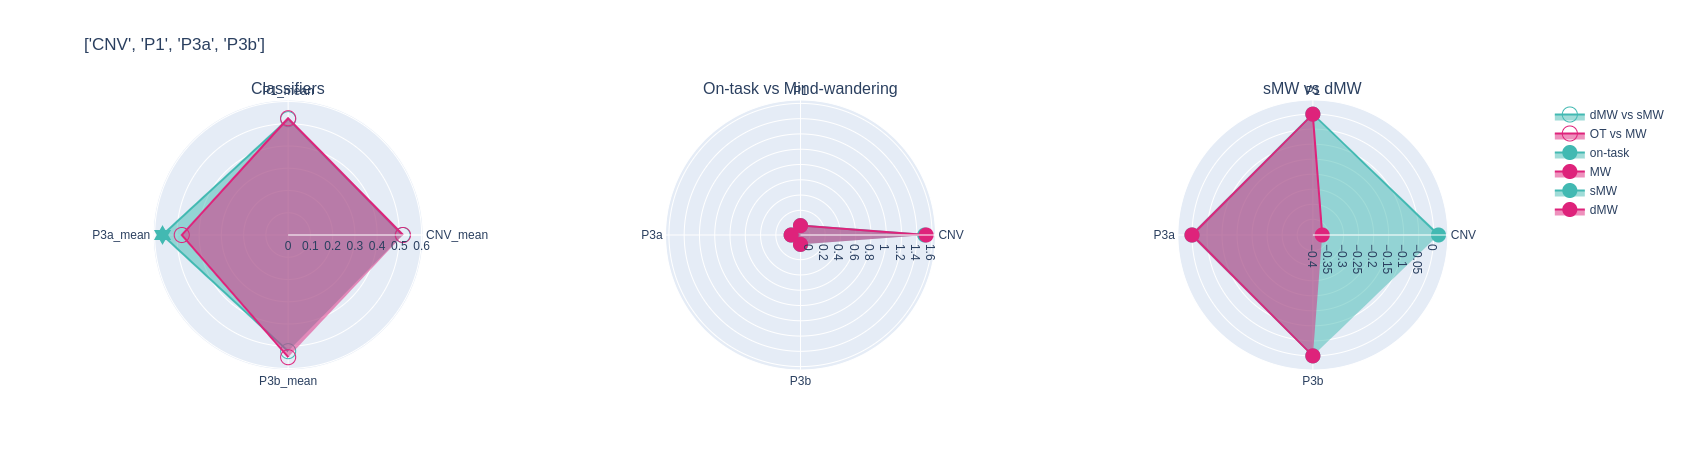

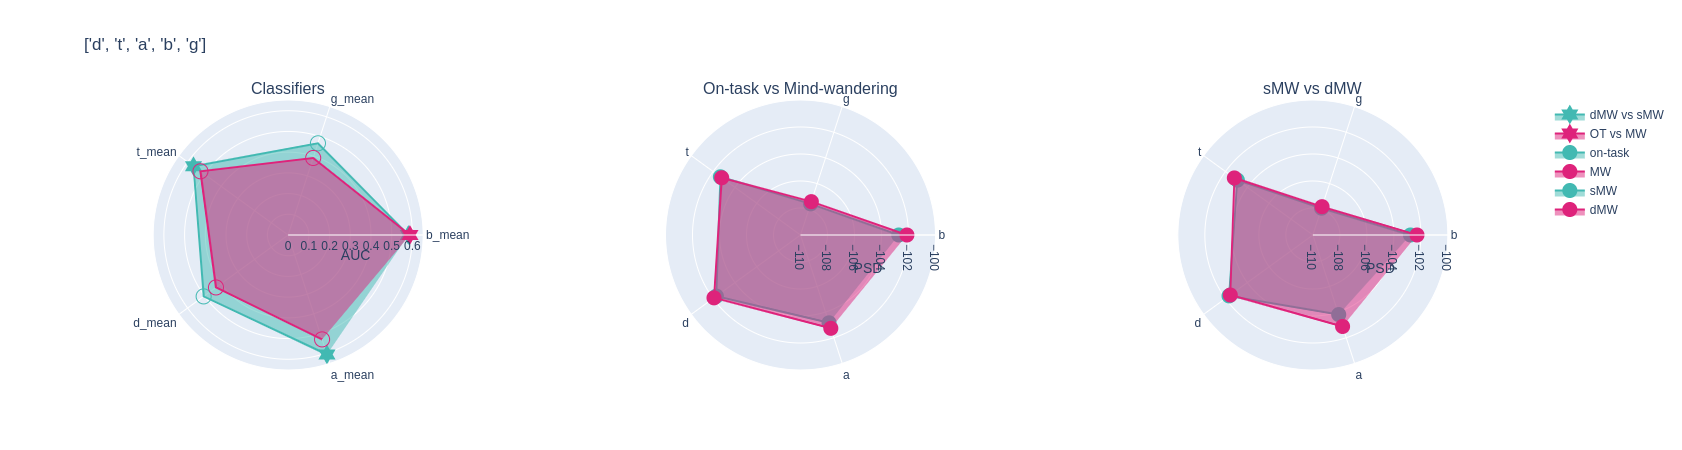

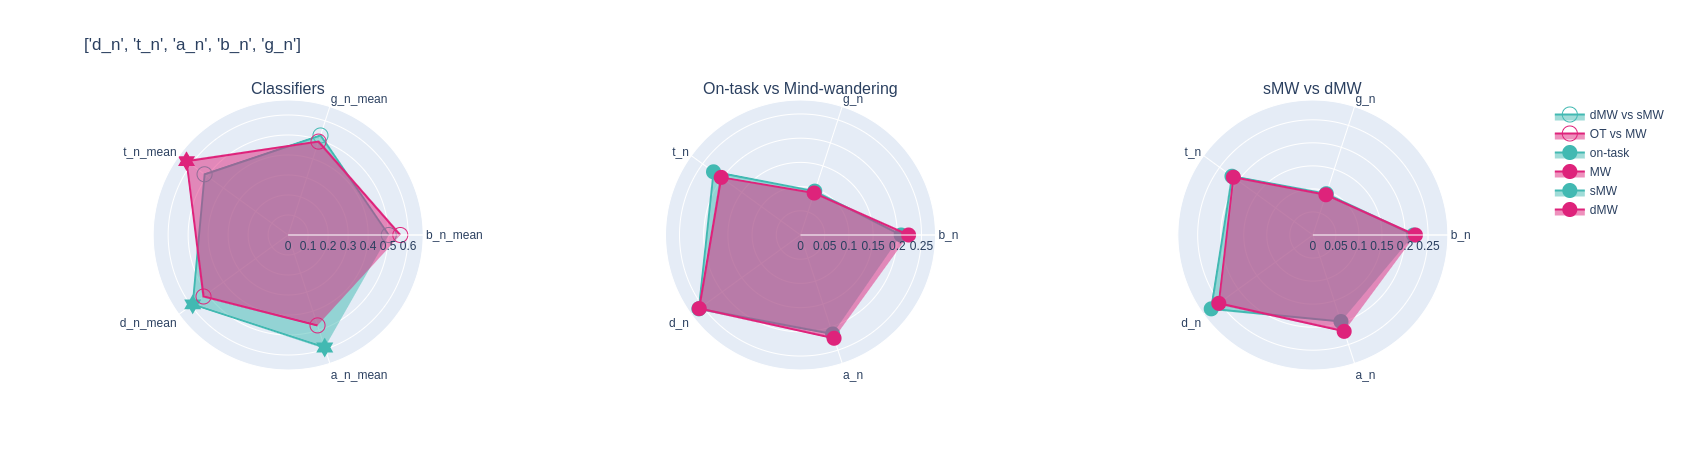

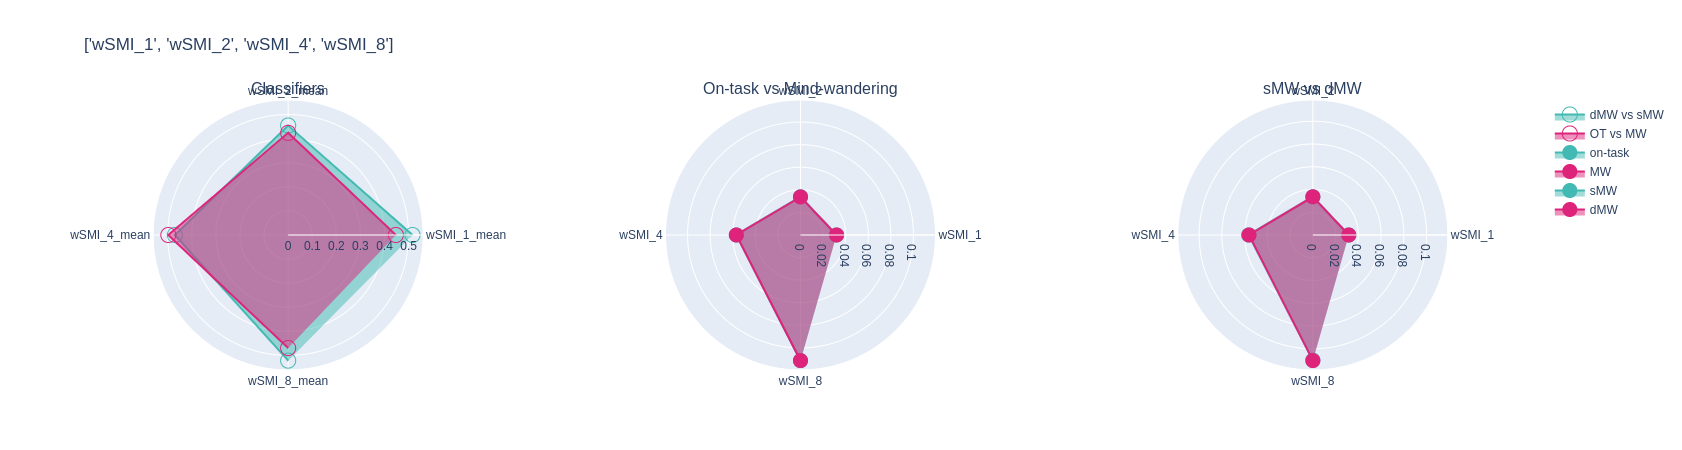

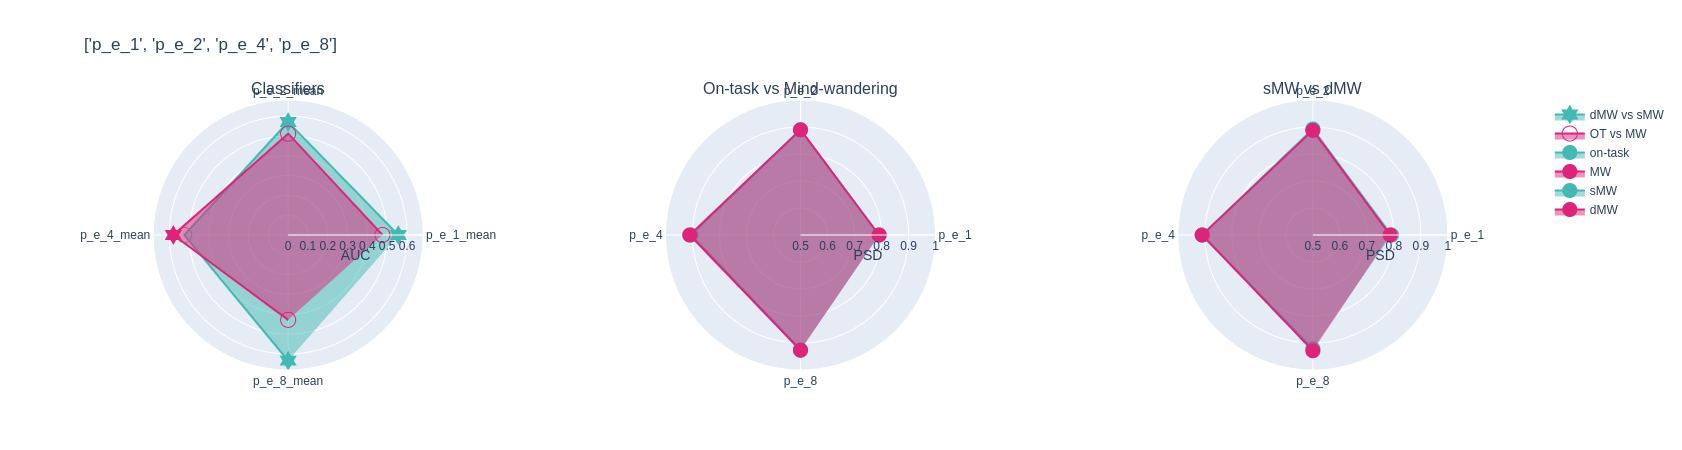

In [345]:
for i in types_markers:
    marker = i
    smw  = df_mw.query("mind == 'sMW'")
    smw = smw[smw['markers'].isin([i for i in marker])]
    dmw  = df_mw.query("mind == 'dMW'")
    dmw = dmw[dmw['markers'].isin([i for i in marker])]
    MW  = df_mind.query("mind2 == 'mw'")
    MW = MW[MW['markers'].isin([i for i in marker])]
    ot  = df_mind.query("mind2 == 'on-task'")
    ot = ot[ot['markers'].isin([i for i in marker])]
    mw =aucs_mw[aucs_mw['index'].isin([i+'_mean' for i in marker])]
    mind =aucs_mind[aucs_mind['index'].isin([i+'_mean' for i in marker])]


    fig = make_subplots(rows=1, cols=3, 
                        subplot_titles = ['Classifiers', 'On-task vs Mind-wandering','sMW vs dMW'],
                        specs=[[{"type": "scatterpolar"}, {"type": "polar"}, {"type": "polar"}]])

    fig.add_trace(go.Scatterpolar(
        r=mw.auc,
        theta=mw['index'],
        fill='toself',
        name='dMW vs sMW', 
        marker = {'color':lblue, 'size': 15},
        marker_symbol= symbol_fun(mw['index'], significant_mw)
    ),
        row = 1, col = 1)

    fig.add_trace(go.Scatterpolar(
        r=mind.auc,
        theta=mind['index'],
        fill='toself',
        name='OT vs MW',
        marker = {'color':pink, 'size': 15},
        marker_symbol= symbol_fun(mind['index'], significant_mind)
    ),
        row = 1, col = 1)

    fig.add_trace(go.Scatterpolar(
        r=ot.val,
        theta=ot['markers'],
        fill='toself',
        name='on-task', 
        marker = {'color':lblue, 'size': 15},
    #     marker_symbol= symbol_fun(dmw['markers'])
    ),
        row = 1, col = 2)

    fig.add_trace(go.Scatterpolar(
        r=MW.val,
        theta=MW['markers'],
        fill='toself',
        name='MW',
        marker = {'color':pink, 'size': 15},
    #     marker_symbol= 'symbol_fun(smw['markers'])'
    ),
        row = 1, col = 2)

    fig.add_trace(go.Scatterpolar(
        r=smw.val,
        theta=dmw['markers'],
        fill='toself',
        name='sMW', 
        marker = {'color':lblue, 'size': 15},
    #     marker_symbol= symbol_fun(dmw['markers'])
    ),
        row = 1, col = 3)

    fig.add_trace(go.Scatterpolar(
        r=dmw.val,
        theta=dmw['markers'],
        fill='toself',
        name='dMW',
        marker = {'color':pink, 'size': 15},
    #     marker_symbol= symbol_fun(smw['markers'])
    ),
        row = 1, col = 3)
    
    if marker == freqs:
        fig.update_polars(radialaxis= {'title': 'AUC',}, row=1, col=1)
        fig.update_polars(radialaxis= {'title': 'PSD','range':[-110, -100]}, row=1, col=2)
        fig.update_polars(radialaxis= {'title': 'PSD','range':[-110, -100]}, row=1, col=3)
    elif marker == p_e:
        fig.update_polars(radialaxis= {'title': 'AUC',}, row=1, col=1)
        fig.update_polars(radialaxis= {'title': 'PSD','range':[0.5, 1]}, row=1, col=2)
        fig.update_polars(radialaxis= {'title': 'PSD','range':[0.5, 1]}, row=1, col=3)

    fig.update_layout(
        title=f"{marker}",
    #     width=500,
    #     height=500,

        polar=dict(
        radialaxis=dict(
          visible=True,

        ),
      ),

    )

    fig.show()
#     pio.write_json(fig, 'Figs/radar_auc_freq_n.plotly')

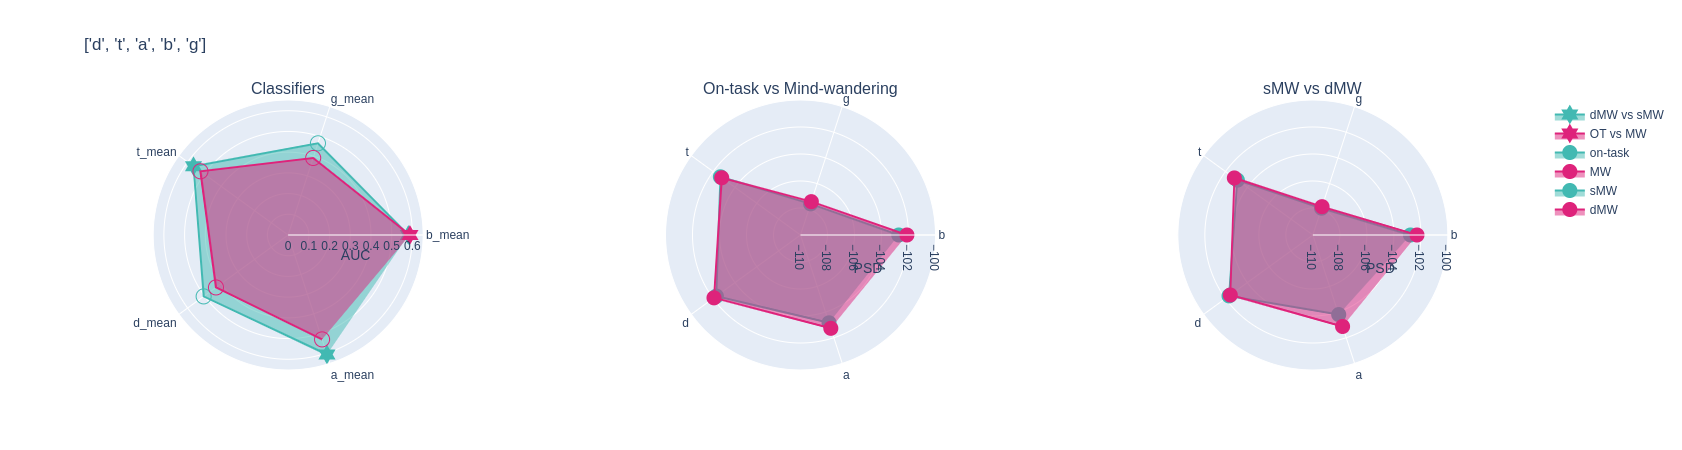

In [340]:
marker = freqs
smw  = df_mw.query("mind == 'sMW'")
smw = smw[smw['markers'].isin([i for i in marker])]
dmw  = df_mw.query("mind == 'dMW'")
dmw = dmw[dmw['markers'].isin([i for i in marker])]
MW  = df_mind.query("mind2 == 'mw'")
MW = MW[MW['markers'].isin([i for i in marker])]
ot  = df_mind.query("mind2 == 'on-task'")
ot = ot[ot['markers'].isin([i for i in marker])]
mw =aucs_mw[aucs_mw['index'].isin([i+'_mean' for i in marker])]
mind =aucs_mind[aucs_mind['index'].isin([i+'_mean' for i in marker])]


fig = make_subplots(rows=1, cols=3, 
                    subplot_titles = ['Classifiers', 'On-task vs Mind-wandering','sMW vs dMW'],
                    specs=[[{"type": "scatterpolar"}, {"type": "polar"}, {"type": "polar"}]])

fig.add_trace(go.Scatterpolar(
    r=mw.auc,
    theta=mw['index'],
    fill='toself',
    name='dMW vs sMW', 
    marker = {'color':lblue, 'size': 15},
    marker_symbol= symbol_fun(mw['index'], significant_mw)
),
    row = 1, col = 1)

fig.add_trace(go.Scatterpolar(
    r=mind.auc,
    theta=mind['index'],
    fill='toself',
    name='OT vs MW',
    marker = {'color':pink, 'size': 15},
    marker_symbol= symbol_fun(mind['index'], significant_mind)
),
    row = 1, col = 1)

fig.add_trace(go.Scatterpolar(
    r=ot.val,
    theta=ot['markers'],
    fill='toself',
    name='on-task', 
    marker = {'color':lblue, 'size': 15},
#     marker_symbol= symbol_fun(dmw['markers'])
),
    row = 1, col = 2)

fig.add_trace(go.Scatterpolar(
    r=MW.val,
    theta=MW['markers'],
    fill='toself',
    name='MW',
    marker = {'color':pink, 'size': 15},
#     marker_symbol= 'symbol_fun(smw['markers'])'
),
    row = 1, col = 2)

fig.add_trace(go.Scatterpolar(
    r=smw.val,
    theta=dmw['markers'],
    fill='toself',
    name='sMW', 
    marker = {'color':lblue, 'size': 15},
#     marker_symbol= symbol_fun(dmw['markers'])
),
    row = 1, col = 3)

fig.add_trace(go.Scatterpolar(
    r=dmw.val,
    theta=dmw['markers'],
    fill='toself',
    name='dMW',
    marker = {'color':pink, 'size': 15},
#     marker_symbol= symbol_fun(smw['markers'])
),
    row = 1, col = 3)

fig.update_polars(radialaxis= {'title': 'AUC',}, row=1, col=1)
fig.update_polars(radialaxis= {'title': 'PSD','range':[-110, -100]}, row=1, col=2)
fig.update_polars(radialaxis= {'title': 'PSD','range':[-110, -100]}, row=1, col=3)

fig.update_layout(
    title=f"{marker}",
#     width=500,
#     height=500,
    
    polar=dict(
    radialaxis=dict(
      visible=True,
        
    ),
  ),
    
)

fig.show()
pio.write_json(fig, 'Figs/radar_auc_freq_n.plotly')

# PCA

In [361]:
X.shape

(8272, 1)

In [363]:
variance = lambda x: np.std(x)/np.mean(x)

agg_dict = {k: ["mean", 'std'] for k in markers}
agg_dict.update({k: "first" for k in df_markers.drop(markers, axis=1).columns})

df_mind = (
    df_markers.query("probe == 'PC'")
    .groupby(["segment", "participant"], as_index=False)
    .agg(agg_dict)
    #     .query("mind != 'sMW'") #if you want to test against just one of the mw
    .assign(mind2=lambda df: np.where(df.mind == "on-task", "on-task", "mw"))
)

df_mind.columns = df_mind.columns.map("_".join)

df_mind = df_mind.rename(
    columns={
        "participant_first": "participant",
        "probe_first": "probe",
        "mind_first": "mind",
        "segment_first": "segment",
        "mind2_": "mind2",
    }
).drop(["participant", "probe", "mind", "segment"], axis=1)

y, lbl = pd.factorize(df_mind['mind2'])
X = df_mind[df_mind.drop('mind2', axis=1).columns].astype("float32").values

pca = PCA(n_components = 3)
pca.fit(X,y)

display(
pca.components_.shape,
pca.explained_variance_
)

mind_components = pd.DataFrame(pca.components_.T, index = markers)

(3, 47)

array([6.5118700e+06, 6.6338005e+01, 2.7431515e+01], dtype=float32)

ValueError: Shape of passed values is (47, 3), indices imply (23, 3)

In [378]:
df_mind['Unnamed: 0_first']

0         4
1       610
2       944
3      4167
4      4440
       ... 
171     543
172    4894
173    1818
174    4977
175     603
Name: Unnamed: 0_first, Length: 176, dtype: int64

In [21]:
agg_dict = {k:['mean','std'] for k in markers }
agg_dict.update({k:'first' for k in df_markers.drop(markers, axis=1).columns})

df_mw = (
    df_markers
    .query("probe == 'SC'")
    .query("mind != 'on-task'")
    .groupby(['segment', 'participant'], as_index = False).agg(agg_dict)
)

df_mw.columns = df_mw.columns.map("_".join)

df_mw  = (df_mw
            .rename(columns = {'participant_first':'participant', 'probe_first':'probe', 'mind_first':'mind', 'segment_first':'segment'})
            .drop(['participant', 'probe', 'segment'], axis = 1) 
           )

(3, 47)

array([6.5118700e+06, 6.6338005e+01, 2.7431515e+01], dtype=float32)

ValueError: Shape of passed values is (47, 3), indices imply (46, 3)

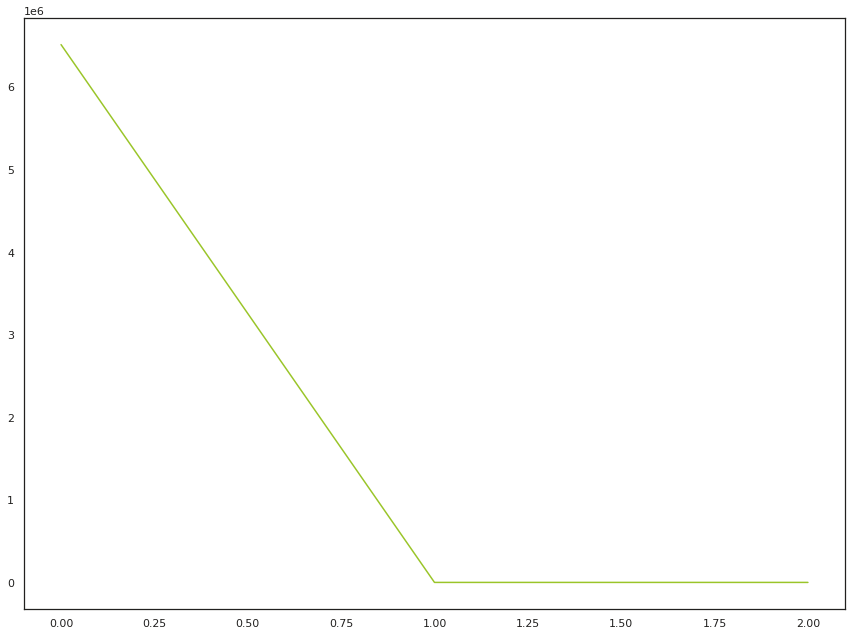

In [367]:
pca = PCA(n_components = 3)
pca.fit(X,y)

display(
pca.components_.shape,
pca.explained_variance_
)
plt.plot(pca.explained_variance_)

components = pd.DataFrame(pca.components_.T, index = [x for marker in markers for x in (marker + '_mean', marker + '_std')])
sns.scatterplot(components[0], components[1])